In [16]:
import random
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

In [17]:
class AgentState(TypedDict):
    player_name:str
    guesses:list[int]
    attempts:int
    lower_bound:int
    upper_bound:int
    target_guess:int
    current_guess:int
    hint_guess:str

In [18]:
def setup(state:AgentState) -> AgentState:
    '''Sets up the guess name with random expected number within the bounds'''
    print(f"Welcome, {state['player_name']}! The game has begun. Iam thiking of number between {state['lower_bound']} and {state['upper_bound']}.")
    state['target_guess'] = random.randint(state['lower_bound'], state['upper_bound'])
    state['attempts'] =0
    state['guesses']=[]
    return state

In [19]:
def guess(state:AgentState) -> AgentState:
    '''Makes a guess between lower bound and higher bound'''
    state['attempts'] = state['attempts'] + 1
    state['current_guess'] = random.randint(state['lower_bound'], state['upper_bound'])
    state['guesses'].append(state['current_guess'])
    print(f"Attempt {state['attempts']}: Guessing {state['current_guess']} (Current range: {state['lower_bound']}-{state['upper_bound']})")
    return state


In [20]:
def hinter(state:AgentState) -> AgentState:
    '''Hints if not target and adjust lower bound and upper bound appropriately'''
    if state['current_guess'] < state['target_guess']:
        print(f"Hint: The number {state['current_guess']} is too low. Try higher!")
        state['lower_bound'] = state['current_guess']
    elif state['current_guess'] > state['target_guess']:
        print(f"Hint: The number {state['current_guess']} is too high. Try lower!")
        state['upper_bound'] = state['current_guess']
    return state

In [21]:
def should_continue(state:AgentState) -> AgentState:
    if state['current_guess'] == state['target_guess']:
        print(f"Success! Correct! You found the number {state['target_guess']} in {state['attempts']} attempts.")
        print("GAME OVER: Number found!")
        return "end"
    elif state['attempts'] > 7:
        print("GAME OVER: Failed, Not able to guess the number")
        return "end"
    else:
        print(f"CONTINUING: {state["attempts"]}/7 used")
        return "guess"

In [22]:
graph = StateGraph(AgentState)

graph.add_node('setup_node', setup)
graph.add_node('guess_node', guess)
graph.add_node('hint_node', hinter)

graph.add_edge(START, 'setup_node')
graph.add_edge('setup_node', 'guess_node')
graph.add_edge('guess_node', 'hint_node')

graph.add_conditional_edges(
    'hint_node',
    should_continue,
    {
        'end' : END,
        "guess" : 'guess_node'
    }
)

app = graph.compile()

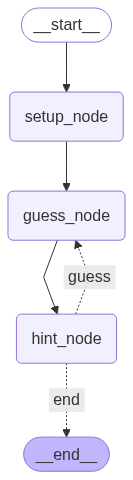

In [14]:
from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png()))

In [24]:
inp = AgentState(player_name='Agazhi', lower_bound=1, upper_bound=20)
result = app.invoke(inp)
result

Welcome, Agazhi! The game has begun. Iam thiking of number between 1 and 20.
Attempt 1: Guessing 9 (Current range: 1-20)
Hint: The number 9 is too high. Try lower!
CONTINUING: 1/7 used
Attempt 2: Guessing 2 (Current range: 1-9)
Hint: The number 2 is too low. Try higher!
CONTINUING: 2/7 used
Attempt 3: Guessing 3 (Current range: 2-9)
Success! Correct! You found the number 3 in 3 attempts.
GAME OVER: Number found!


{'player_name': 'Agazhi',
 'guesses': [9, 2, 3],
 'attempts': 3,
 'lower_bound': 2,
 'upper_bound': 9,
 'target_guess': 3,
 'current_guess': 3}